## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

# Importing the necessary libraries

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [154]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

## Loading the dataset

In [155]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
 #loading data into a pandas dataframe
Loan = pd.read_csv('/content/drive/MyDrive/PROJECT2/Loan_Modelling.csv')

In [157]:
data = Loan.copy()

# **Data Overview**

* Observations
* Sanity checks

### Viewing the first and last 5 rows of the dataset

In [158]:

# checking the first 5 rows of data
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### CHecking Shape of DataSet

In [159]:

data.shape

(5000, 14)

The dataset has 5000 rows and 14 columns

### Checking the attribute types

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Based on the above result we can say all columns in dataset are numerical.

### Checking the statistical summary

In [161]:
data.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1. The avg age of the customers looks like 45 years.
2. 9.6% of customers in the dataset opted for personal loans. This aligns with the 9% conversion rate mentioned in the problem statement.
3. the average income is around 73.8K, also income is 98K for 75%

### Checking for missing values

In [162]:

data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


There are no missing values in dataset

### Checking for duplicate values

In [163]:
data.duplicated().sum()

0

### Dropping columns

In [164]:
data.drop(columns=['ID'],inplace=True)

We dont need ID column, hence dropping it.




## Data PreProcessing

### Checking for Anomalous Values

In [165]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [166]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [167]:
# Correcting the experience values
data["Experience"] = data["Experience"].abs()

We see there are values with negative experience, best thing is to replace all negative values to absolute values

# Checking for unique values in age and education

In [168]:
data["Education"].unique()

array([1, 2, 3])

In [169]:
data["Age"].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

### Feature Engineering

In [170]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [171]:


data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [172]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

Preparing the data for Model Building
Converting columns to Categories which have Grouped,Ordinal and Nominal value

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Here we create a function to analyse each independent variable and establish patters

In [173]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [174]:
#function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.show()  # show the plot

###Observations on Mortgage

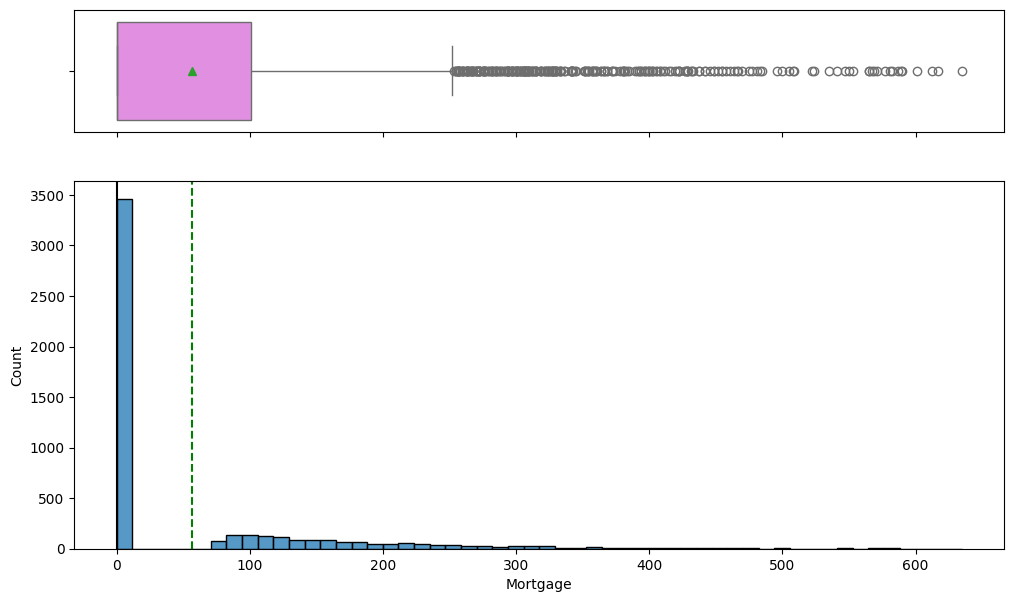

In [175]:
histogram_boxplot(data, "Mortgage")

What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

1. The high frequency of 0 mortgage values suggests that a large segment of the population in this dataset either does not own a home or has no mortgage obligation.
2. There are outliers here showing individuals with unusually high mortgage values.
3. The median is 0.0, highlighting that over 50% of the individuals have no mortgage. This aligns with the observed high concentration of data near 0 in the histogram as we see.

### Age Observation

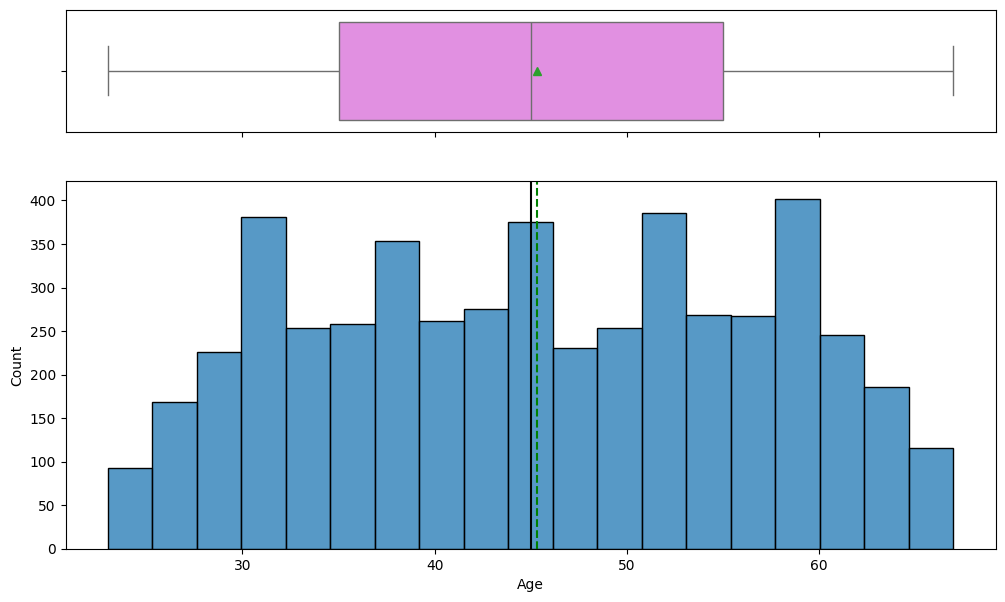

In [176]:
histogram_boxplot(data, "Age")

1. Most customers seem to be around 45 years old, with a fairly even spread of ages across the dataset.
2. There are age groups of people on the left and right of the mean



### Observations on Income

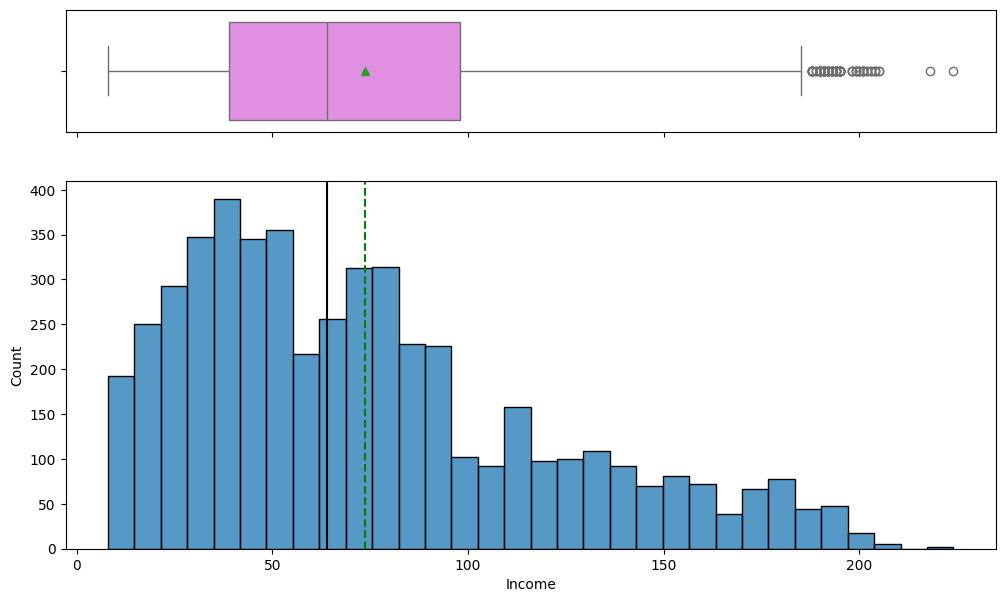

In [177]:
histogram_boxplot(data, "Income")

1. The income distribution is right-skewed, with most customers having lower incomes.
2. A large proportion of customers have annual incomes in the range of 0 to 100 (thousands).
3. Customers with higher incomes might have a greater capacity to repay loans, making them potentially better candidates for marketing campaigns.

### Observation on Experience

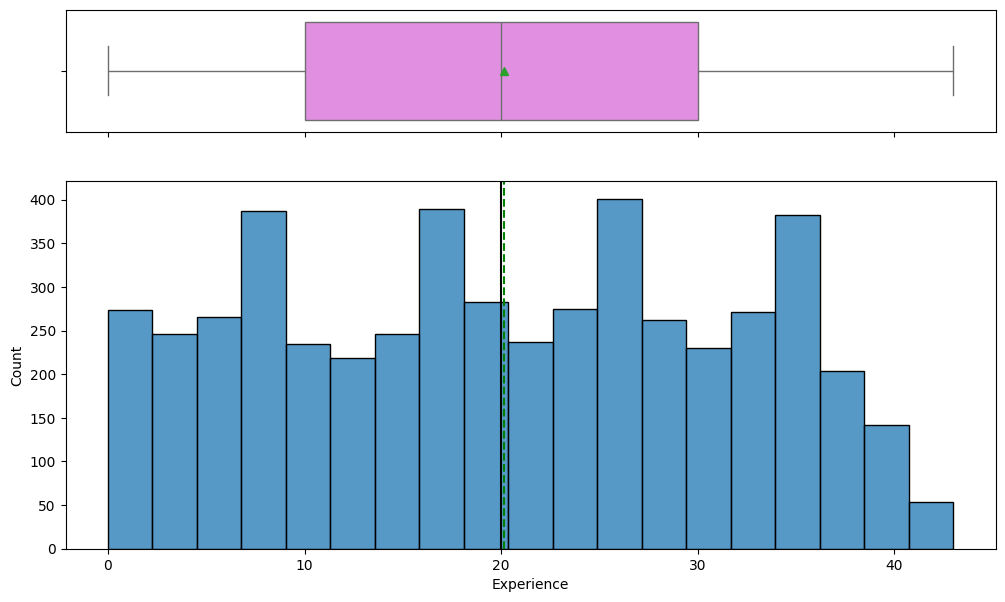

In [178]:
histogram_boxplot(data, "Experience")

1. The majority of customers have 20+ years of experience. This suggests a stable customer base likely to have predictable income and financial habits.
2. The distribution is symmetrical

### Observations on Credit card

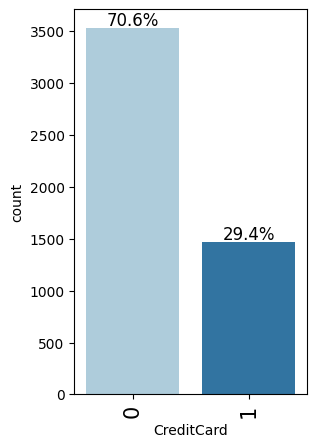

In [179]:
labeled_barplot(data, "CreditCard", perc=True)

1.As we can see most of the customers here dont own a CC, so bank definintely can target these

2.Customers who already own a credit card might have a higher financial activity level and could be a strong candidate group for personal loans.

### Observation on CC Avg

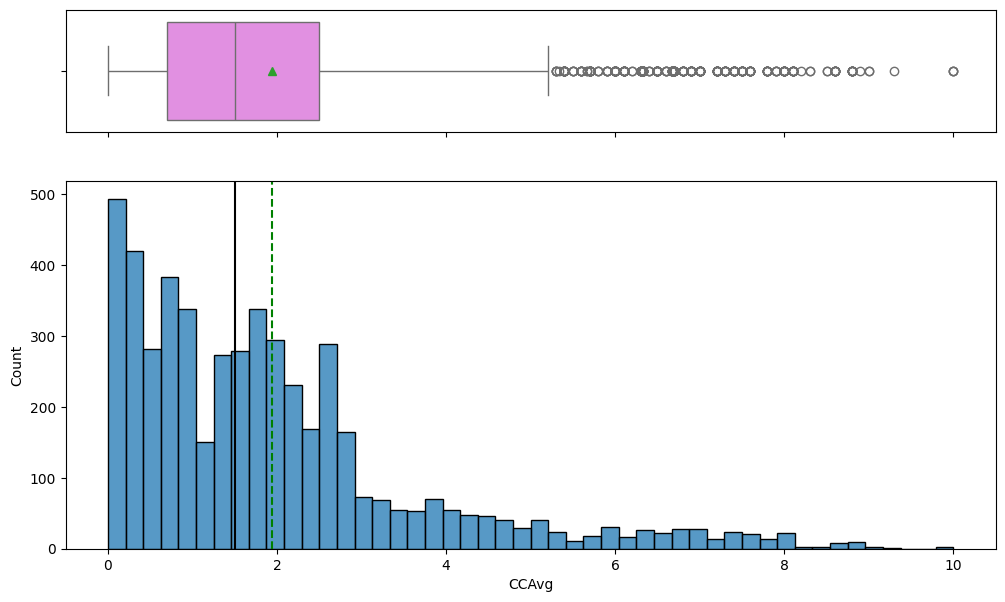

In [180]:
histogram_boxplot(data, "CCAvg")

1. The majority of customers have low credit card spending. This indicates a conservative credit card usage pattern among most customers.
2. Customers with higher CCAvg might be more active in financial transactions and could have a greater likelihood of purchasing a personal loan.
3. Customers with very low CCAvg might need targeted campaigns, possibly encouraging higher engagement with bank products.

### Family Observations

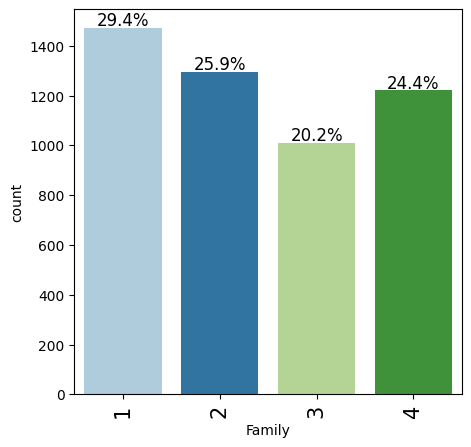

In [181]:
labeled_barplot(data, "Family", perc=True)

1. Most customers belong to families of size 1, 2, or 3, with family sizes of 1 and 2 being the most common.
2. Family size might correlate with personal loan uptake. For example, larger families may have a higher need for loans to meet family expenses, while smaller families might use loans for personal investments.

### Education Observastions

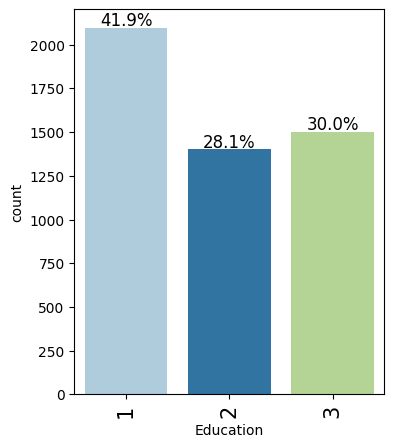

In [182]:
labeled_barplot(data, "Education", perc=True)

1. Most customers fall into the Undergraduate (1) or Graduate (2) education levels.
2. The smallest group consists of customers with an Advanced/Professional (3) education level.
3.Graduates might be in mid-career stages with stable income and could represent a key target segment for loans.
4.Advanced/Professional education holders may have higher income levels, making them a premium target group for loans.

### Observations on Zip Code

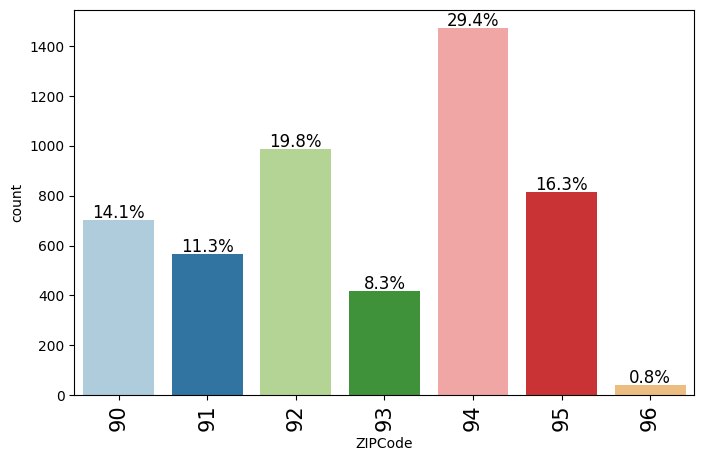

In [183]:
data.head(5)

labeled_barplot(data, "ZIPCode", perc=True)

1. Zip code starting from 94 have more customers, potential target there from demography point of view.
2. 96 Zip code have very few customers
3. Create tailored loan products or campaigns specific to regional needs (e.g., mortgages, education loans, or personal loans for specific purposes).

### Observations on Securities

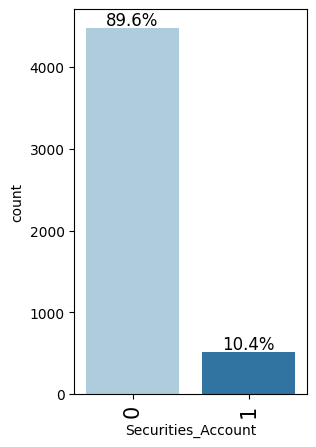

In [184]:
labeled_barplot(data, "Securities_Account", perc=True)

1. Most of the customers have no securities accout
2. Customers with securities accounts might be more likely to take personal loans if they are actively managing investments or need liquidity.

### Observations from Online

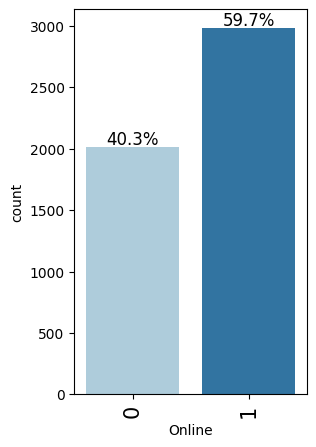

In [185]:

labeled_barplot(data, "Online", perc=True)


1. The large number of customers using online banking indicates a tech-savvy customer base.
2. These customers might be more receptive to digital marketing campaigns and loan offers delivered through online channels
3. Potential Correlation with Personal Loan Uptake: Customers might opt for purchasing additional products like loans

    

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### BiVariate Analysis

In [186]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### function to plot distributions wrt target

In [187]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Corelation

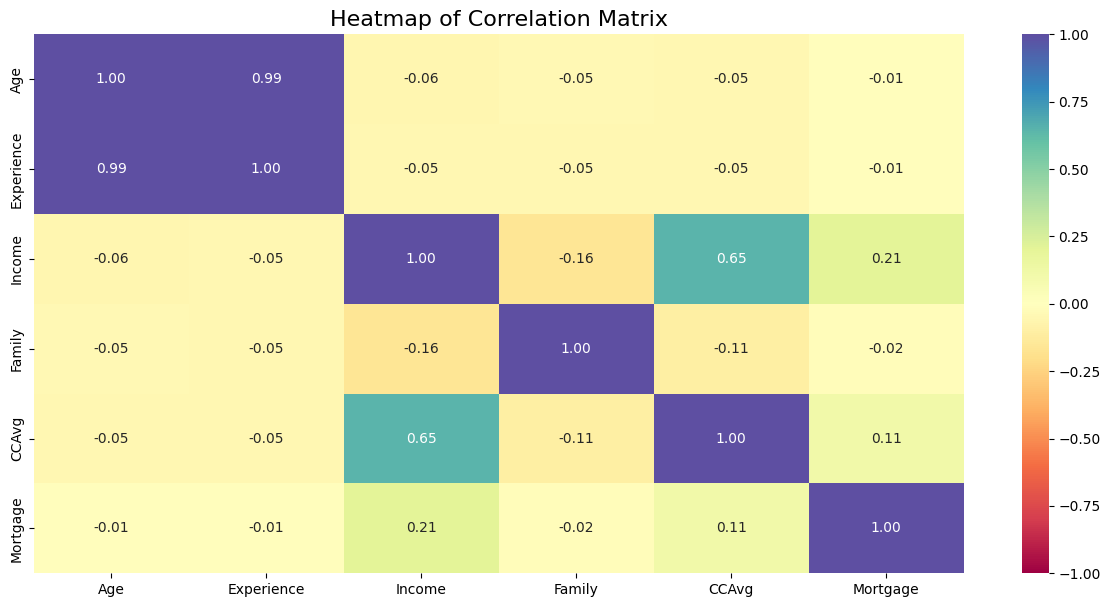

In [188]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.show()

1. Age and experience have strong positive co relation - ncluding both in a predictive model could lead to redundancy. It may be better to drop one of these features.
2. Income and Ccavg show moderate corelation
3. slightly positive corelation is betwwen mortgage and income

### Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


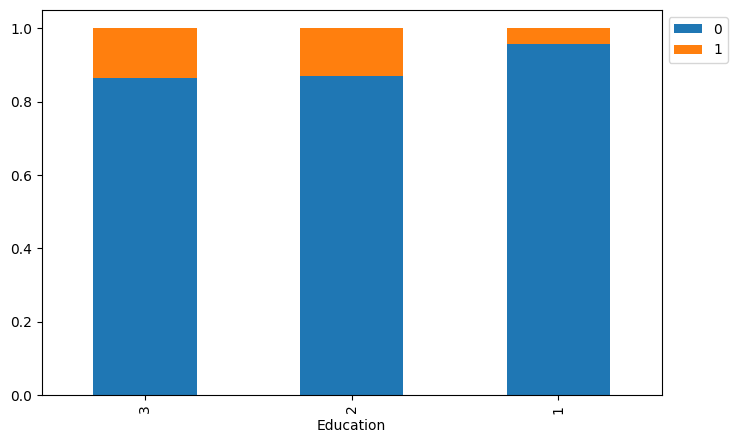

In [189]:
stacked_barplot(data, "Education", "Personal_Loan")

1. As we can see higher education means more loan
2. Only Graduates take less loan
3. The bank can prioritize marketing campaigns targeting Graduate (2) and Advanced/Professional (3) segments for personal loans.

### Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


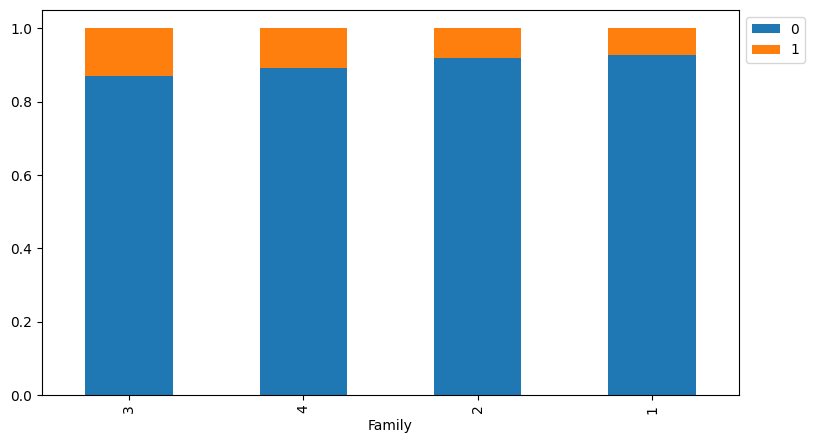

In [190]:
stacked_barplot(data, "Family", "Personal_Loan")

1. Family with 3 are taking more loan
2. Family Size 4 has the second-highest loan acceptance rate (10.97%).
3. Indications that marketing campaign might target with family size of 3 and 4 for loan acceptance.

### Personal Loan vs Zip Code

In [191]:
data.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


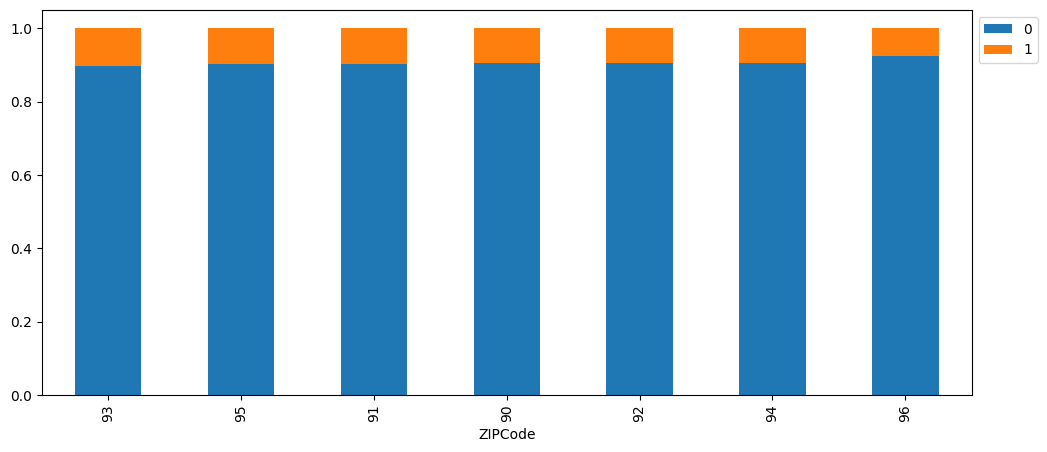

In [192]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")



The above data suggests the target customers to be from zip codes 94 92 and 95, marketting campaigns to taregt the above 3 demography

### Personal Loan and Income

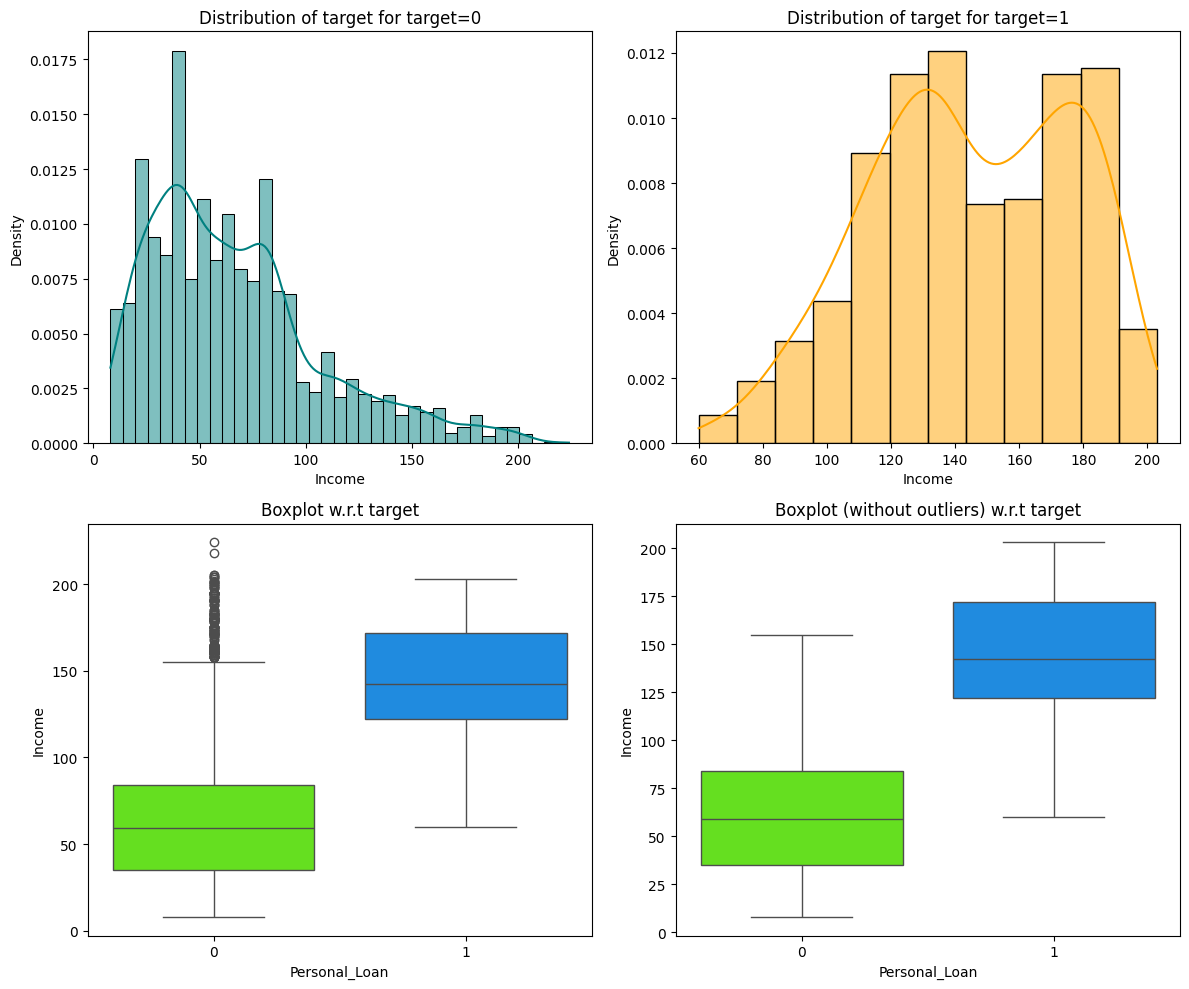

In [193]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

1. Higher the income, more loan accpetance, Most customers who did not accept a personal loan have an income less than 100 (in thousands).
2. Create targeted campaigns focused on investment-based or premium loan products for high-income customers.

### Personal Loan vs Credit card spending

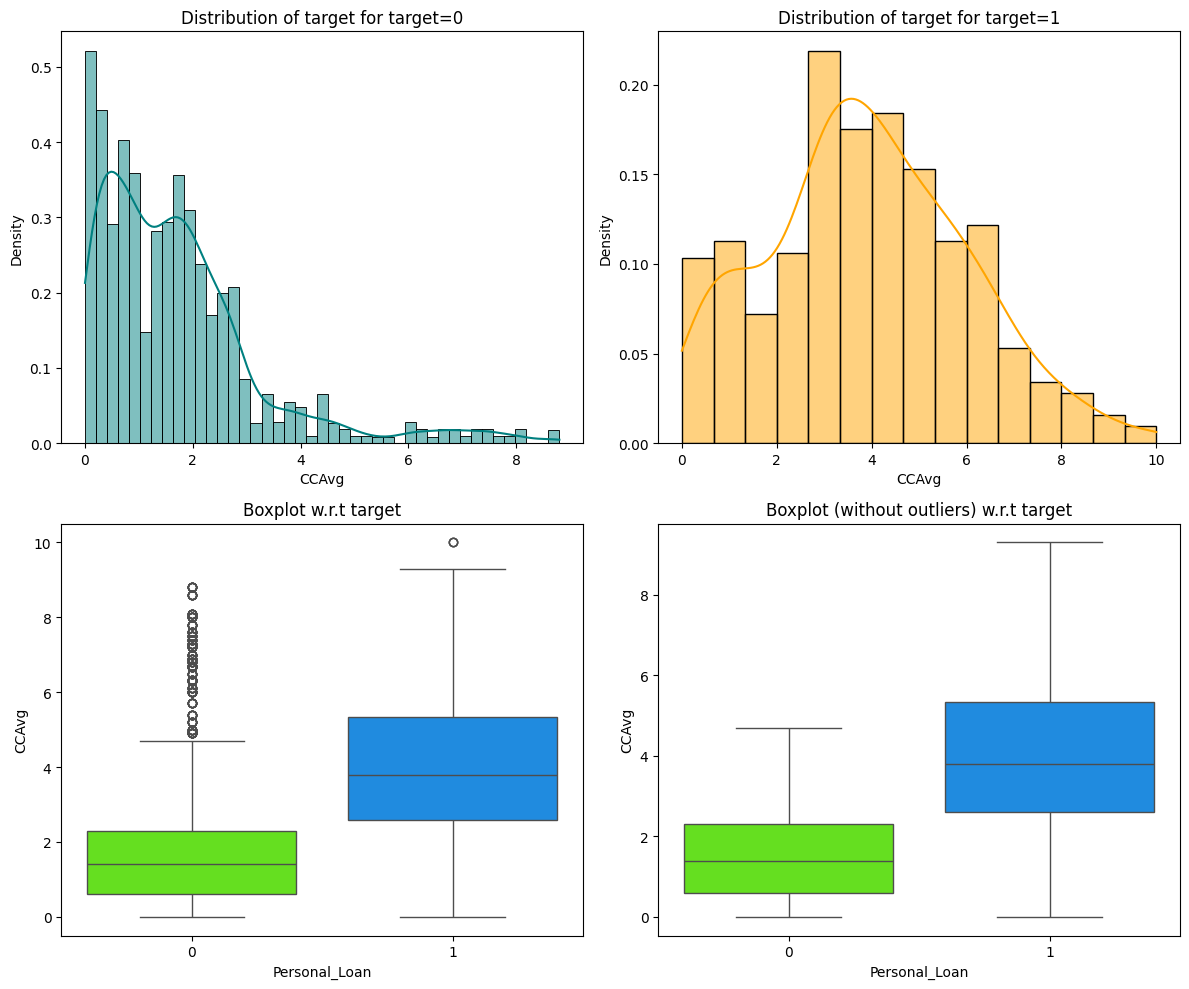

In [194]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

1. Higher credit card spending is a distinguishing characteristic for customers who are more likely to accept personal loans.
2. This attribute can be a strong predictor for identifying potential personal loan customers.
3.Customers who did not accept personal loans (Personal_Loan = 0) generally have lower credit card spending.

### Personal Loan Vc Credit Card

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


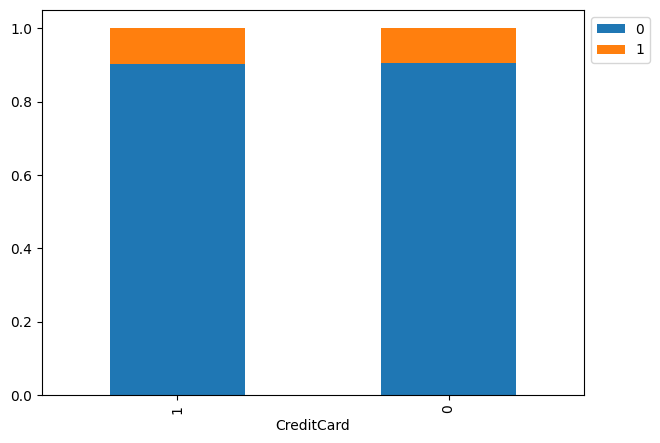

In [195]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

customers with a bank-issued credit card may be slightly more likely to accept personal loans

### Personal Loan and CD account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


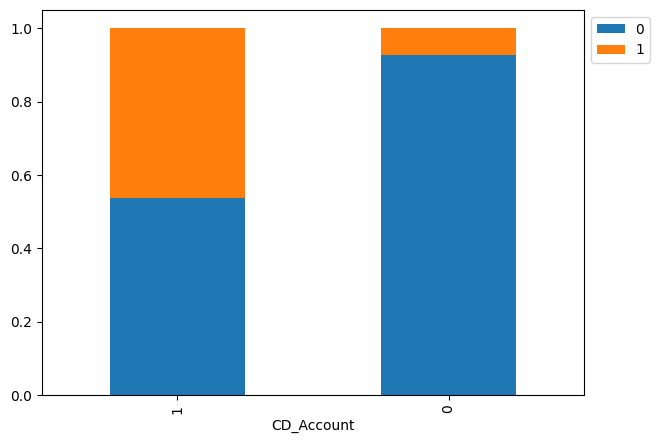

In [196]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

Customers with a CD account are significantly more likely to accept personal loans

### Personal Loan and Age

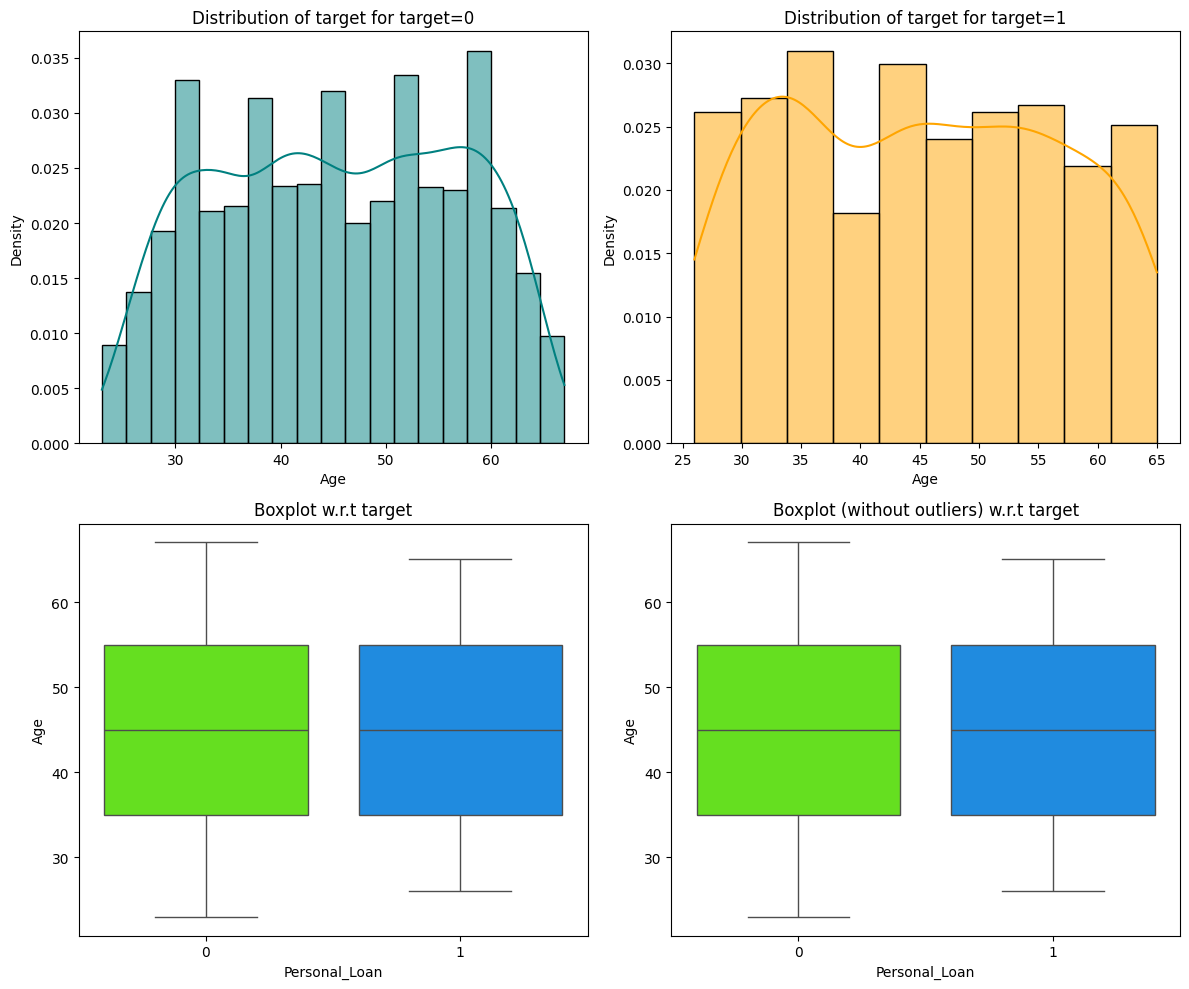

In [197]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

### Outliers Detection

In [198]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # 25th percentile
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)  # 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

print(lower)
print(upper)


Age             5.0
Experience    -20.0
Income        -49.5
Family         -2.0
CCAvg          -2.0
Mortgage     -151.5
dtype: float64
Age            85.0
Experience     60.0
Income        186.5
Family          6.0
CCAvg           5.2
Mortgage      252.5
dtype: float64


In [199]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


<Axes: >

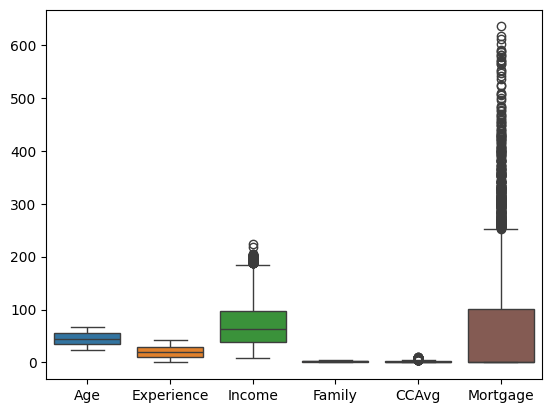

In [200]:
sns.boxplot(data=data.select_dtypes(include=["float64", "int64"]))

1. Outliers in columns like Income, CCAvg, and Mortgage are present in very small proportions (1.92%, 6.48%, 5.82% respectively). These outliers are unlikely to significantly distort the model's performance or predictions.
2. Decision trees split data hierarchically and are robust to extreme values, hence not treating these outliers

### Data Preparation

In [204]:
class_proportions = data["Personal_Loan"].value_counts(normalize=True) *100
print(class_proportions)

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


In [202]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

In [203]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


## Model Building

### Decision Tree (sklearn default)

In [208]:
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation Criterion

Recall priority is 	High here because Identifying most loan buyers is critical to avoid lost opportunities.

In [209]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [210]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Evaluate Model Performance - Training Data

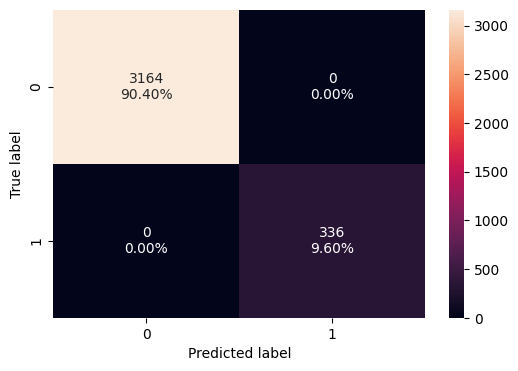

In [211]:
confusion_matrix_sklearn(model, X_train, y_train)

In [212]:
# Evaluate model performance on training data
train_performance_default = model_performance_classification_sklearn(model, X_train, y_train)
print("Training Data Performance:")
print(train_performance_default)


Training Data Performance:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


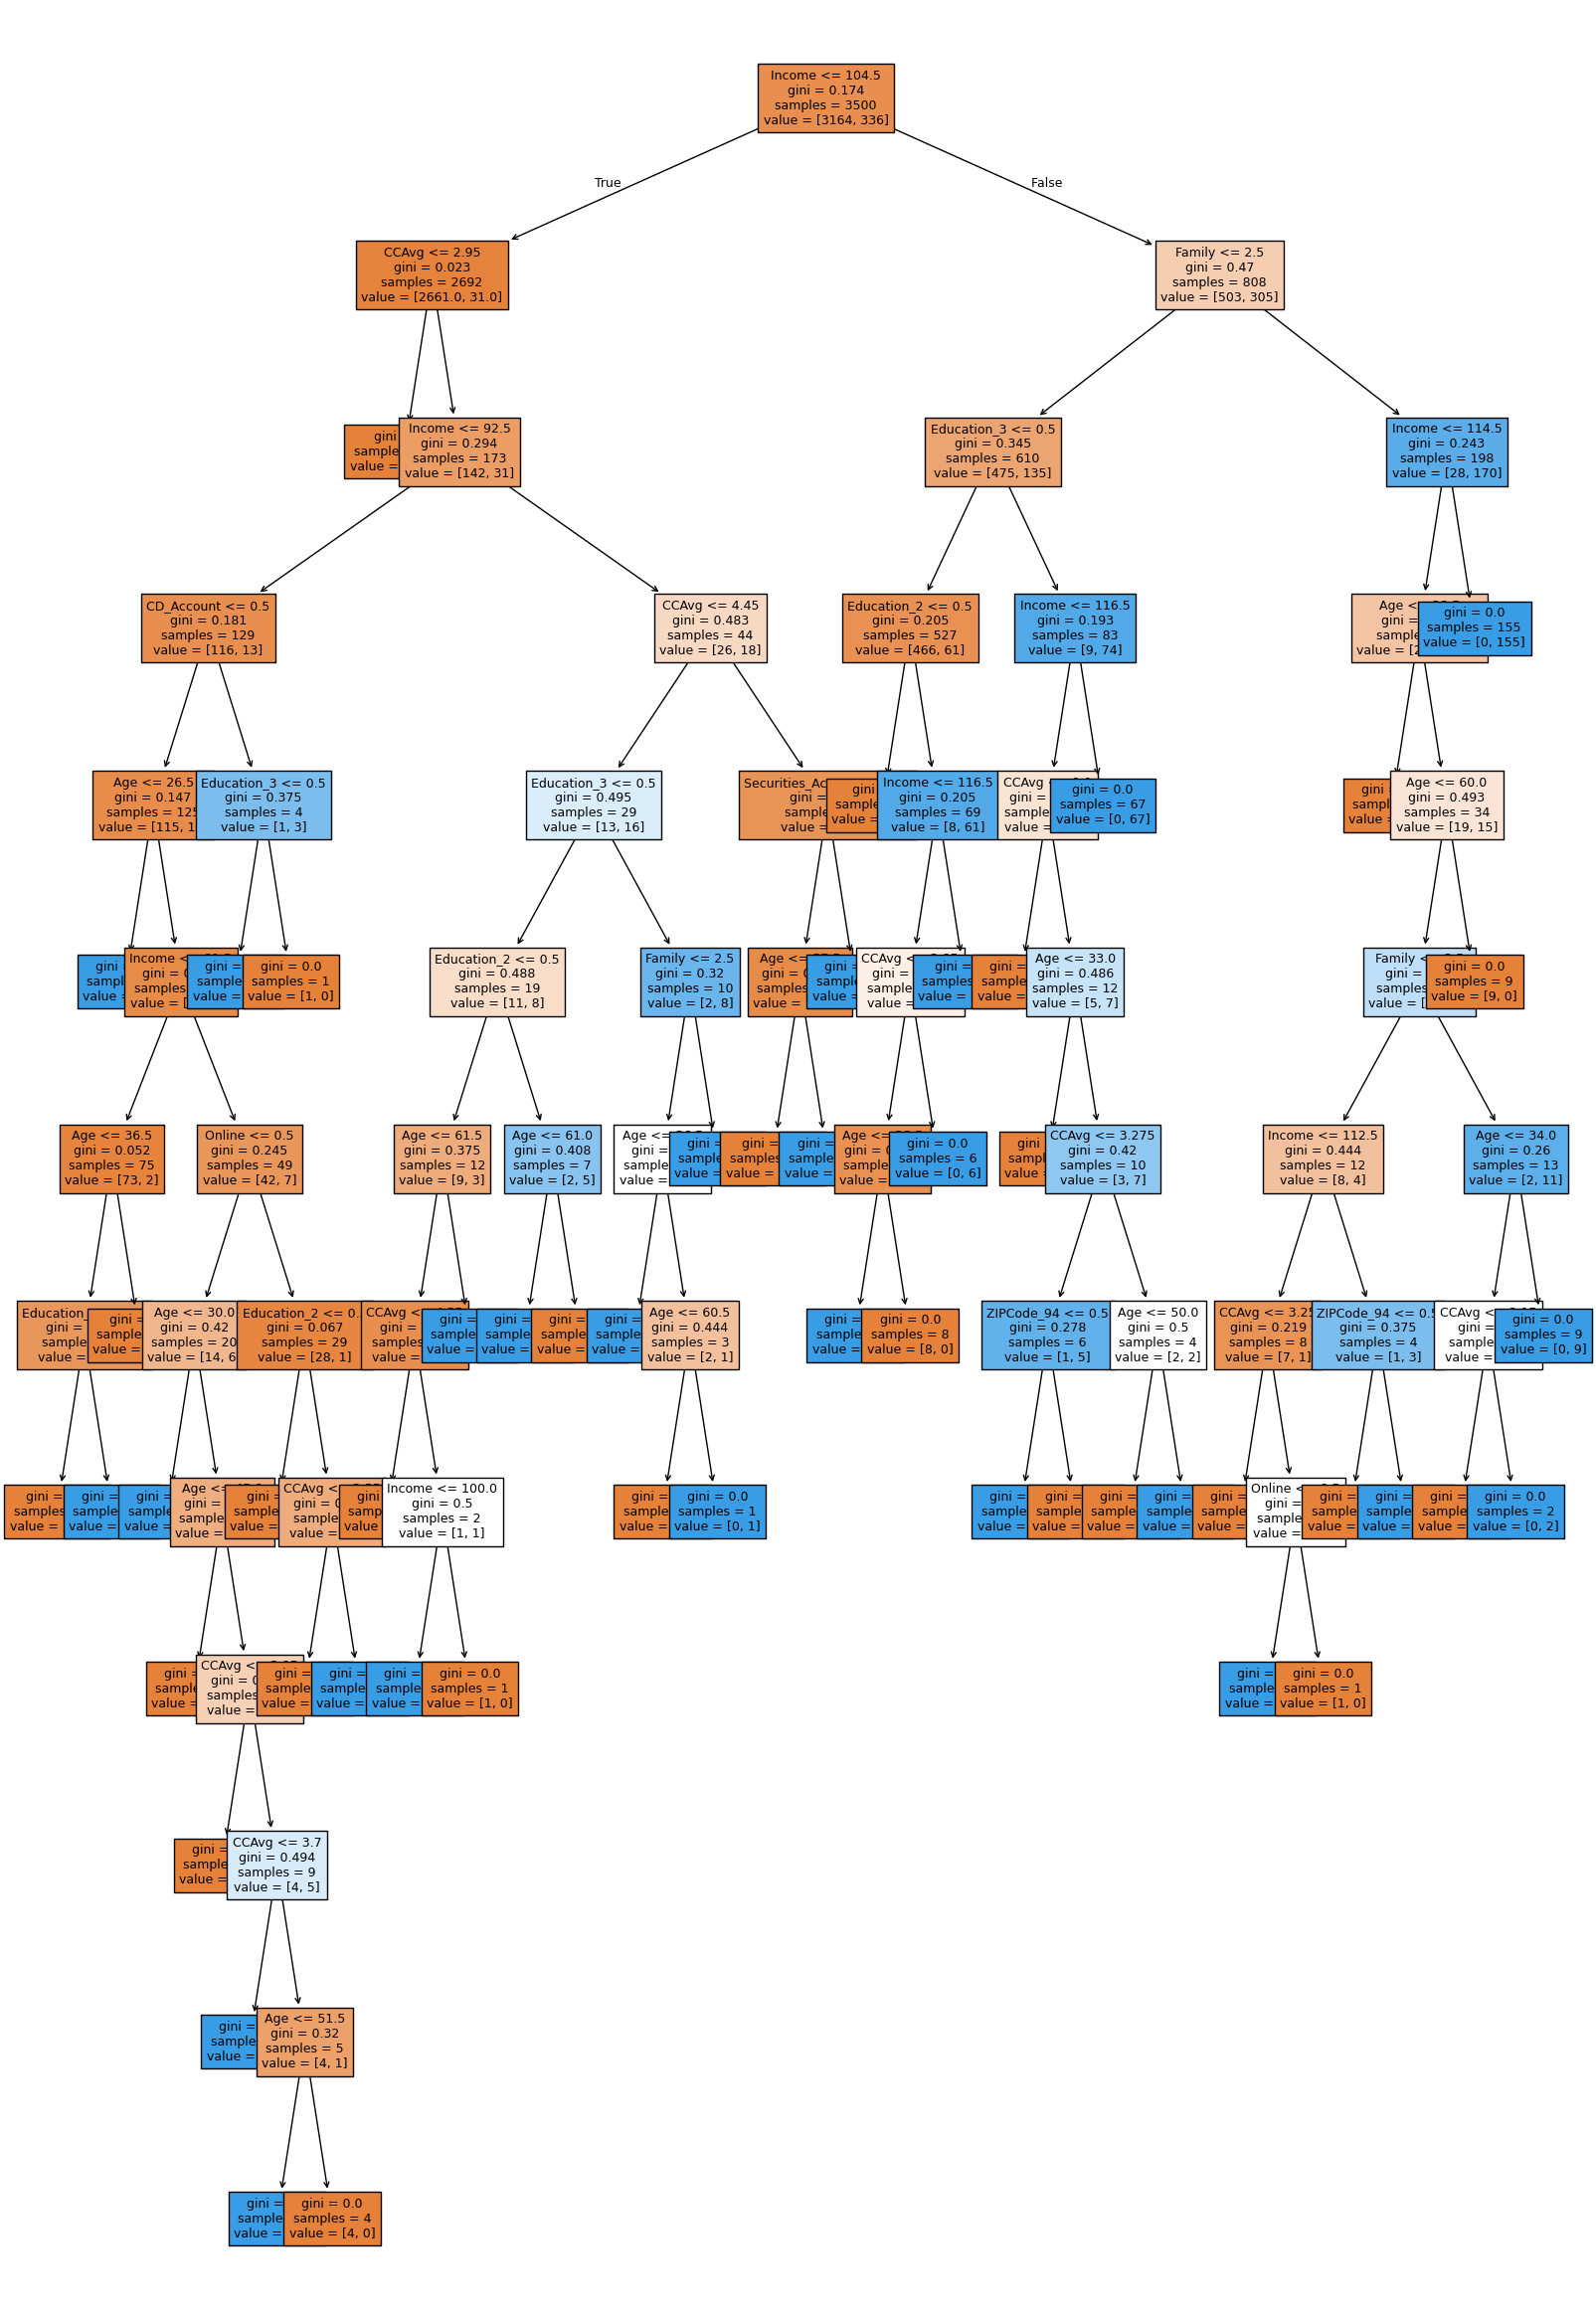

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.362115
Family              0.207239
Education_2         0.163788
Education_3         0.147659
CCAvg               0.052223
Age                 0.048992
CD_Account          0.005728
ZIPCode_94          0.005213
Online              0.004393
Securities_Account  0.002649
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


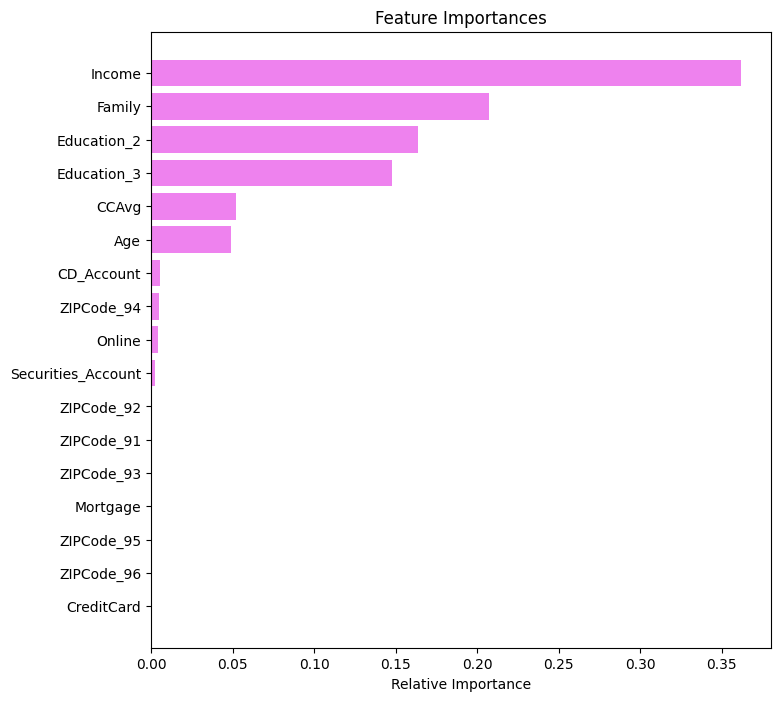

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on test data

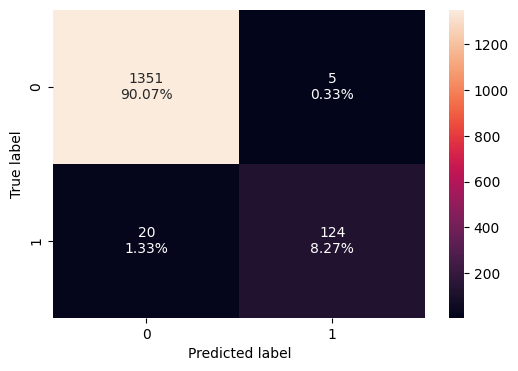

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Evaluate model performance on training data
test_performance_default = model_performance_classification_sklearn(model, X_test, y_test)
print("Test Data Performance:")
print(test_performance_default)

Test Data Performance:
   Accuracy    Recall  Precision        F1
0  0.983333  0.861111    0.96124  0.908425


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5, scoring="f1")
print(f"Cross-Validated F1 Scores: {scores}")
print(f"Mean F1 Score: {scores.mean()}")

Cross-Validated F1 Scores: [0.89795918 0.90810811 0.88324873 0.93684211 0.92063492]
Mean F1 Score: 0.9093586097288247


## Model Performance Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 7, 9, 10],
    'min_samples_split': [5, 10, 20],
    'max_leaf_nodes': [50, 100, 200, 300]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 7, 'max_leaf_nodes': 50, 'min_samples_split': 5}


#### Pre-pruning

In [ ]:

# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [5, 20, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')  # Smallest difference between train and test F1-scores
best_f1_score = 0.0  # Highest test F1-score

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight="balanced",  # Handle class imbalance
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # Update the best estimator and scores based on criteria
            if score_diff < best_score_diff and test_f1_score > best_f1_score:
                best_score_diff = score_diff
                best_f1_score = test_f1_score
                best_estimator = estimator

# Print the best parameters and performance
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best Test F1-Score: {best_f1_score}")


Best parameters found:
Max depth: 4
Max leaf nodes: 50
Min samples split: 5
Best Test F1-Score: 0.8501529051987767


In [ ]:
# Fit the be#st algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=50,
                       min_samples_split=5, random_state=42)

we couldd have used best_estimator directly to evaluate on the below train and test functions, but just for simplicity keep as estimator.

### Evaluate on Train Data Now

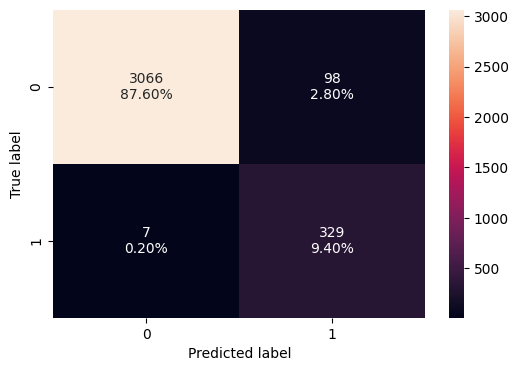

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.97,0.979167,0.770492,0.862385


**Checking performance on test data**

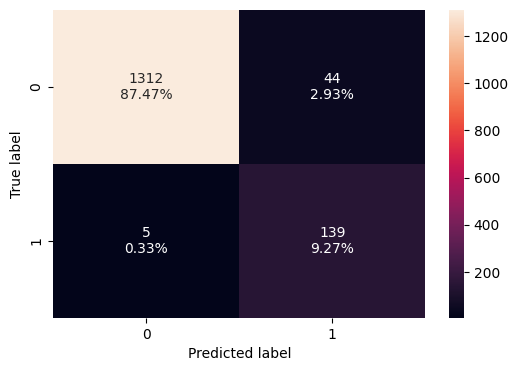

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.967333,0.965278,0.759563,0.850153


## Feature Importance

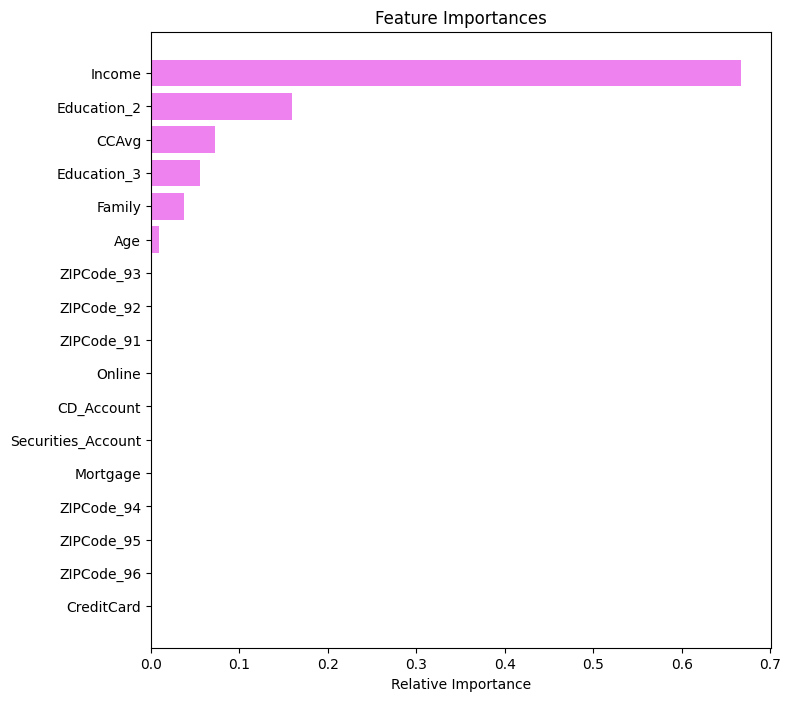

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)
#normalized_importances = importances / np.sum(importances)
#+print(normalized_importances)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Post-pruning

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=1)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

# Display the pruning path
for alpha, impurity in zip(ccp_alphas, impurities):
    print(f"Alpha: {alpha}, Total Impurity: {impurity}")

Alpha: 0.0, Total Impurity: 0.0
Alpha: 0.00025, Total Impurity: 0.0005
Alpha: 0.0002571428571428572, Total Impurity: 0.0010142857142857145
Alpha: 0.00027586206896551704, Total Impurity: 0.0015660098522167487
Alpha: 0.00028571428571428574, Total Impurity: 0.0021374384236453204
Alpha: 0.0003428571428571426, Total Impurity: 0.002480295566502463
Alpha: 0.0004, Total Impurity: 0.003680295566502463
Alpha: 0.00042857142857142855, Total Impurity: 0.004108866995073891
Alpha: 0.00042857142857142855, Total Impurity: 0.00453743842364532
Alpha: 0.000457142857142857, Total Impurity: 0.004994581280788177
Alpha: 0.00046666666666666666, Total Impurity: 0.0054612479474548436
Alpha: 0.00047008978229779136, Total Impurity: 0.009221966205837175
Alpha: 0.0004835164835164835, Total Impurity: 0.010188999172870142
Alpha: 0.000487557603686635, Total Impurity: 0.010676556776556777
Alpha: 0.0004952380952380954, Total Impurity: 0.011667032967032968
Alpha: 0.0005079365079365079, Total Impurity: 0.012174969474969476

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000250,0.000500
2,0.000257,0.001014
3,0.000276,0.001566
4,0.000286,0.002137
5,0.000343,0.002480
6,0.000400,0.003680
7,0.000429,0.004109
8,0.000429,0.004537
9,0.000457,0.004995


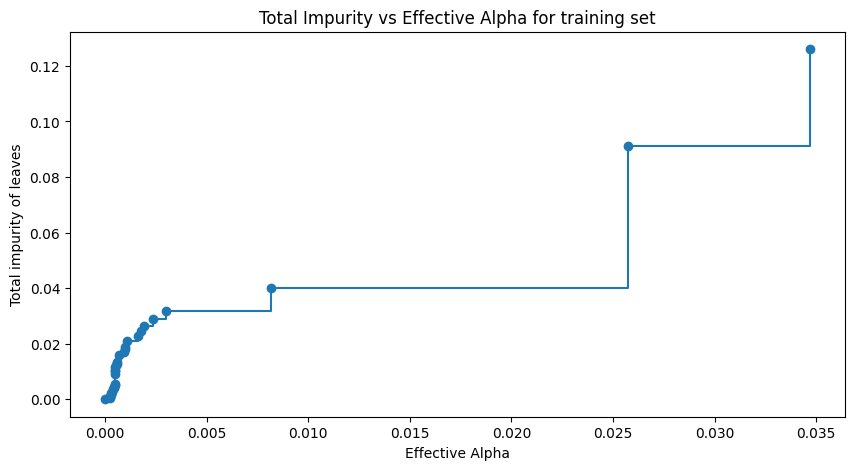

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

Next, we train a decision tree using the effective alphas.

The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the corresponding tree with one node.

In [ ]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    # Fit the model on training data
    clf.fit(X_train, y_train)
    # Append the trained classifier to the list
    clfs.append(clf)

# Print details of the last tree
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04756053380018527


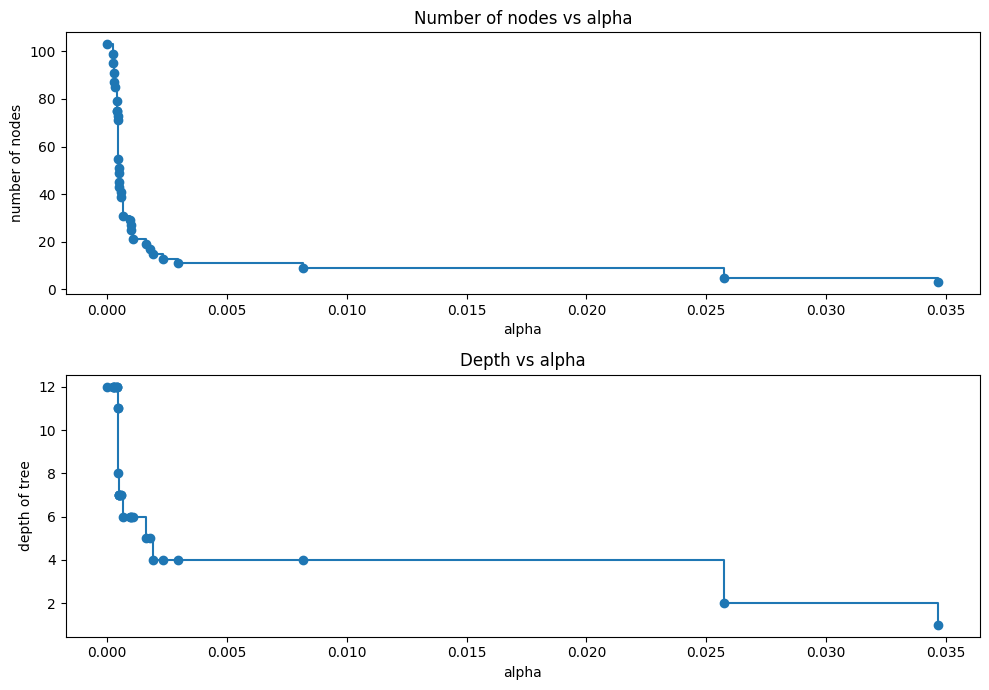

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

Focus on Recall as the priority, ensuring the bank identifies the maximum number of potential loan buyers.

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

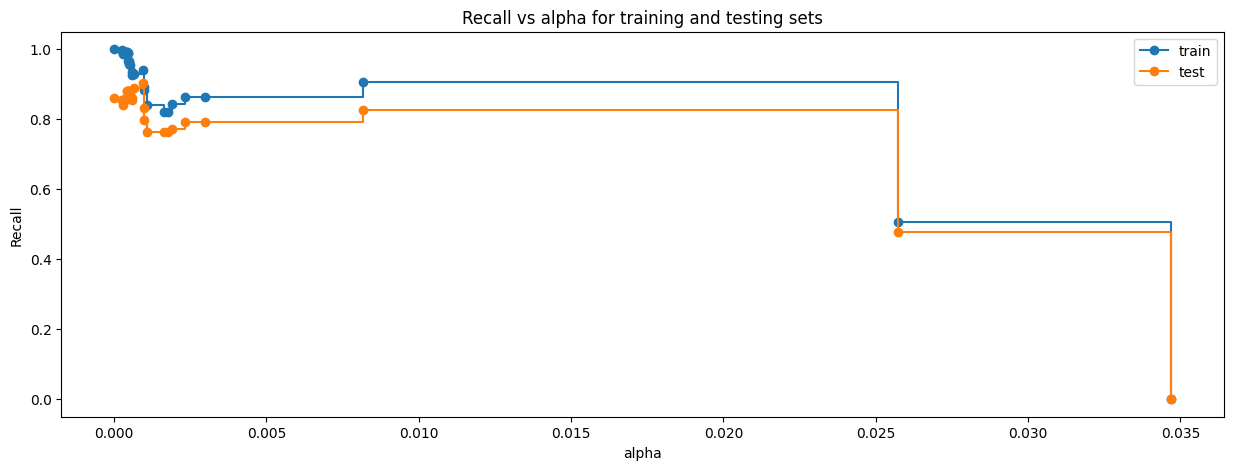

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0009377289377289376, random_state=1)


In [ ]:
#Extract the corresponding ccp_alpha value
ccp_alpha_best = ccp_alphas[index_best_model]


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha_best,  # Use the best alpha value
    class_weight={0: 0.15, 1: 0.85},
    # Adjust class weights if needed
    #class_weight="balanced",
    random_state=1  # Ensure reproducibility
)

In [ ]:
# Fit the model to the training data
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0009377289377289376,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Post Prune modele on training data**

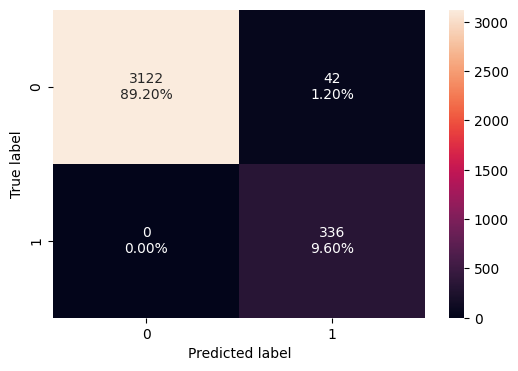

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.988,1.0,0.888889,0.941176


## Tree Visualisation

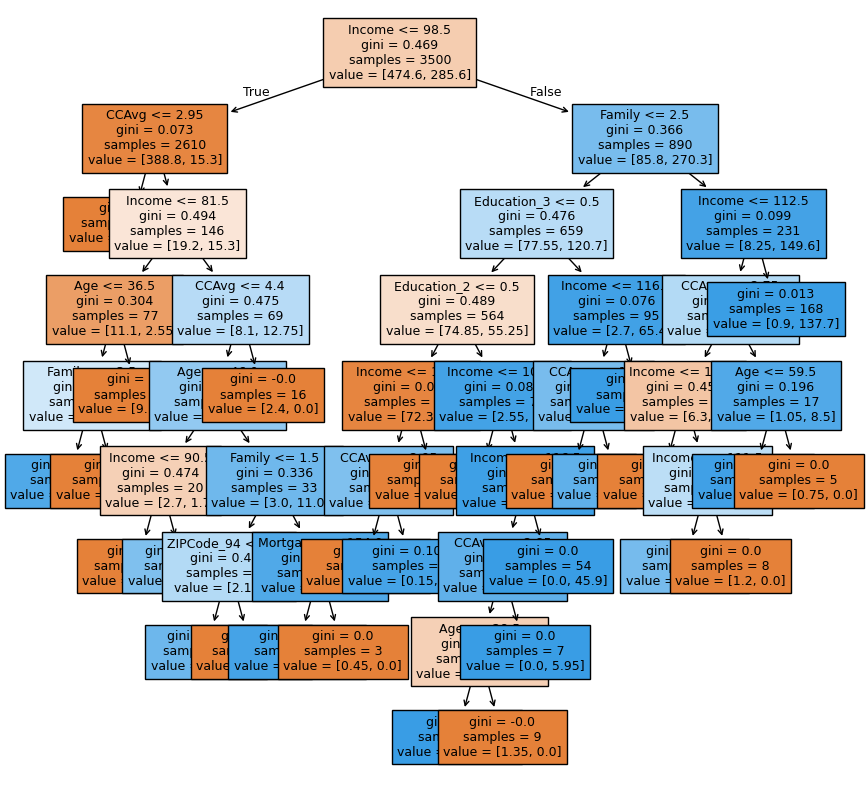

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [9.15, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |   |--- Income >  90.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |--- Age >  46.00
|   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |--- ZIPCode_94 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.90, 3.40] class: 1
|   |   |   |   |   |   |--- ZIPCode_94 >  0.50
|   |   |   |   |   |   |   |---

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.624347
Education_2         0.155491
Education_3         0.074213
Family              0.064681
CCAvg               0.060231
Age                 0.015447
ZIPCode_94          0.003392
Mortgage            0.002199
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


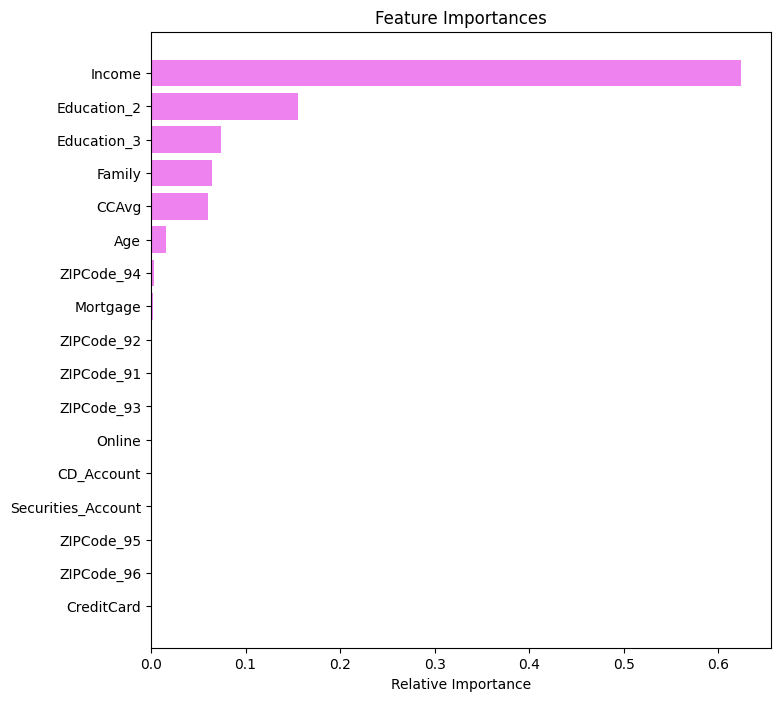

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Running the Post pruned Model on Test

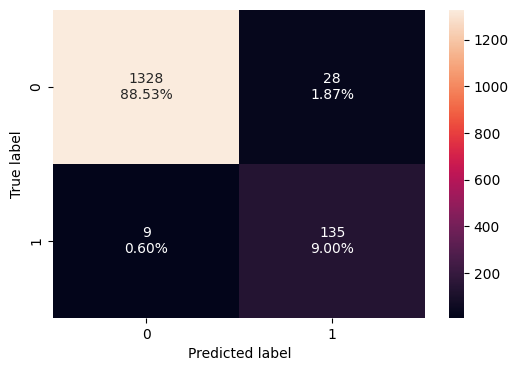

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.975333,0.9375,0.828221,0.879479


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [train_performance_default.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.970000,0.988000
Recall,1.0,0.979167,1.000000
Precision,1.0,0.770492,0.888889
F1,1.0,0.862385,0.941176


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [test_performance_default.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.983333,0.967333,0.975333
Recall,0.861111,0.965278,0.937500
Precision,0.961240,0.759563,0.828221
F1,0.908425,0.850153,0.879479


## Actionable Insights and Business Recommendations


###Reccomendation to use Post Pruned Model for Business Strategy

1. Post-pruning achieves a strong balance between precision (0.828221) and recall (0.937500).
2. F1-score (0.879479) is better than pre-pruning and closer to the default model, with improved generalization.
3. Test F1 score is higher in Post Pruned than Pre-Pruned.
4. Post-pruning retains high recall (0.937500), which is critical for identifying loan takers, while maintaining reasonable precision (0.828221).

### Pre-Pruned vs Post Pruned
1. The Pre-Pruned model achieves a slightly higher Recall on test data but at the cost of significantly lower Precision and F1 Score.
2. Post-Pruning maintains a balance of Recall, Precision, and F1 Score, which is what is needed for our objective .



# What recommedations would you suggest to the bank?

1. The Model can be used to segment liability customers into groups based on their likelihood of accepting a loan, enabling targeted and effective marketing campaigns.
2. The model helps optimize resource allocation by identifying customers least likely to accept loans, reducing marketing spend on non-converting segments
3. The model can prioritize customers with the highest likelihood of accepting a loan, enabling the bank to focus on high-probability segments and maximize return on investment for marketing campaigns
4.Customers who are predicted unlikely to accept a loan could be targeted with alternative financial products, such as credit cards or savings plans

___

### Converting the Notebook to Html

In [213]:
!jupyter nbconvert --to html /content/drive/MyDrive/PROJECT2/Loan-Prediction_full_code_notebook.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/PROJECT2/Loan-Prediction_full_code_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 35 image(s).
[NbConvertApp] Writing 2607854 bytes to /content/drive/MyDrive/PROJECT2/Loan-Prediction_full_code_notebook.html
